# 241119_4FEA_LXe

In [22]:
######################
# import pacakge
######################
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
#get_ipython().run_line_magic('matplotlib', 'ipympl')
#%matplotlib widget
import os
import FEA_analysis
import numpy as np
from datetime import timedelta
from datetime import date
from scipy.signal import find_peaks
from statistics import mean


## Xe volume

In [23]:
##########################
#importing folder folder
##########################

cols = ['timestamp','ch', 'VMON','IMON', 'RAMPINGUP', 'RAMPINGDOWN', 'VSET', 'ISET']
FEA_test_dir = '241119_4FEA_LXe' 
FEA_data = 'beforeLXe'
OS = 'linux'

all_df_caen1, all_df_caen2, df_ctc = FEA_analysis.import_caen_data(FEA_test_dir, FEA_data, cols, OS)

#windows
#caenlogfolder = 'd:\\data\\kamioka-data\\CAEN_logs\\'

In [24]:
df_ctc

,timestamp,In1,In2,In3,In4,AIO1,AIO2,AIO3,AIO4
0,24/11/19-09:46:42,23.04874,23.05010,23.18091,23.11021,3.839076,-0.102004,-276.0845,-0.022035
1,24/11/19-09:46:44,23.04876,23.04994,23.18088,23.11021,3.839038,-0.101999,-276.0867,-0.022265
2,24/11/19-09:46:46,23.04887,23.04969,23.18090,23.11017,3.838951,-0.102004,-276.0870,-0.021902
3,24/11/19-09:46:48,23.04891,23.04962,23.18113,23.11024,3.839021,-0.102002,-276.0894,-0.021474
4,24/11/19-09:46:50,23.04859,23.04979,23.18123,23.11001,3.839069,-0.102003,-276.0875,-0.022124
...,...,...,...,...,...,...,...,...,...
305312,24/11/26-11:34:51,-96.18031,-88.13098,-101.52160,-101.83980,0.007635,0.004916,-112.3718,-0.022372
305313,24/11/26-11:34:53,-96.18089,-88.13183,-101.52150,-101.84020,0.007635,0.004910,-112.6809,-0.022205
305314,24/11/26-11:34:55,-96.18134,-88.13230,-101.52180,-101.84030,0.007636,0.004911,-112.3562,-0.022310
305315,24/11/26-11:34:57,-96.18108,-88.13271,-101.52220,-101.84080,0.007635,0.004914,-112.6818,-0.022332


In [25]:
for i in range(0, len(df_ctc['AIO4'])):
        if df_ctc.loc[i, 'AIO4'] < 0:
              df_ctc.loc[i,'AIO4'] = 0

In [26]:
baselineForPressureGauge = df_ctc['AIO4'].loc[0:100]
print(baselineForPressureGauge)
print(np.mean(baselineForPressureGauge))

df_ctc['AIO4'] -= np.mean(baselineForPressureGauge)
df_ctc

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
96     0.0
97     0.0
98     0.0
99     0.0
100    0.0
Name: AIO4, Length: 101, dtype: float64
0.0


,timestamp,In1,In2,In3,In4,AIO1,AIO2,AIO3,AIO4
0,24/11/19-09:46:42,23.04874,23.05010,23.18091,23.11021,3.839076,-0.102004,-276.0845,0.0
1,24/11/19-09:46:44,23.04876,23.04994,23.18088,23.11021,3.839038,-0.101999,-276.0867,0.0
2,24/11/19-09:46:46,23.04887,23.04969,23.18090,23.11017,3.838951,-0.102004,-276.0870,0.0
3,24/11/19-09:46:48,23.04891,23.04962,23.18113,23.11024,3.839021,-0.102002,-276.0894,0.0
4,24/11/19-09:46:50,23.04859,23.04979,23.18123,23.11001,3.839069,-0.102003,-276.0875,0.0
...,...,...,...,...,...,...,...,...,...
305312,24/11/26-11:34:51,-96.18031,-88.13098,-101.52160,-101.83980,0.007635,0.004916,-112.3718,0.0
305313,24/11/26-11:34:53,-96.18089,-88.13183,-101.52150,-101.84020,0.007635,0.004910,-112.6809,0.0
305314,24/11/26-11:34:55,-96.18134,-88.13230,-101.52180,-101.84030,0.007636,0.004911,-112.3562,0.0
305315,24/11/26-11:34:57,-96.18108,-88.13271,-101.52220,-101.84080,0.007635,0.004914,-112.6818,0.0


In [27]:
y = df_ctc[df_ctc['AIO4'] > 0]
yy = y[y['AIO4'] < 1.01]
yyy = yy['AIO4']/30
x = yy['timestamp']
xx = []
for el in x:
    xx.append(datetime.strptime(el, '%y/%m/%d-%H:%M:%S'))



In [28]:
np.sum(yyy)/2.97

1.8421417669977551

In [29]:
print(xx[-1]-xx[0])
print(xx)

0:07:12
[datetime.datetime(2024, 11, 25, 16, 40, 33), datetime.datetime(2024, 11, 25, 16, 40, 35), datetime.datetime(2024, 11, 25, 16, 40, 39), datetime.datetime(2024, 11, 25, 16, 41, 23), datetime.datetime(2024, 11, 25, 16, 41, 25), datetime.datetime(2024, 11, 25, 16, 41, 27), datetime.datetime(2024, 11, 25, 16, 41, 29), datetime.datetime(2024, 11, 25, 16, 41, 31), datetime.datetime(2024, 11, 25, 16, 41, 33), datetime.datetime(2024, 11, 25, 16, 41, 35), datetime.datetime(2024, 11, 25, 16, 41, 37), datetime.datetime(2024, 11, 25, 16, 41, 39), datetime.datetime(2024, 11, 25, 16, 41, 41), datetime.datetime(2024, 11, 25, 16, 41, 43), datetime.datetime(2024, 11, 25, 16, 41, 45), datetime.datetime(2024, 11, 25, 16, 41, 47), datetime.datetime(2024, 11, 25, 16, 41, 49), datetime.datetime(2024, 11, 25, 16, 41, 51), datetime.datetime(2024, 11, 25, 16, 41, 53), datetime.datetime(2024, 11, 25, 16, 41, 55), datetime.datetime(2024, 11, 25, 16, 41, 57), datetime.datetime(2024, 11, 25, 16, 41, 59), d

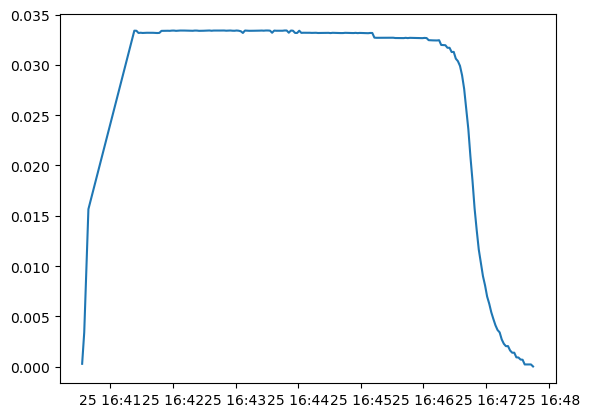

In [30]:
plt.plot(xx,yyy)

## Plots

In [31]:
##########################
#importing folder folder
##########################

cols = ['timestamp','ch', 'VMON','IMON', 'RAMPINGUP', 'RAMPINGDOWN', 'VSET', 'ISET']
FEA_test_dir = '241119_4FEA_LXe' 
FEA_data = 'afterLXe'
OS = 'linux'

all_df_caen1, all_df_caen2, ctc_100 = FEA_analysis.import_caen_data(FEA_test_dir, FEA_data, cols, OS)

#windows
#caenlogfolder = 'd:\\data\\kamioka-data\\CAEN_logs\\'

In [32]:
from FEA_analysis import total_charge

# time period to calculate the baseline
t_start = '24/11/26-12:30:01'
t_end = '24/11/26-12:40:00'

today = datetime.today()

result_caen1 = [total_charge(all_df_caen1[0], t_start, t_end), total_charge(all_df_caen1[1], t_start, t_end), total_charge(all_df_caen1[2], t_start, t_end), total_charge(all_df_caen1[3], t_start, t_end)]
result_caen2 = [total_charge(all_df_caen2[0], t_start, t_end), total_charge(all_df_caen2[1], t_start, t_end), total_charge(all_df_caen2[2], t_start, t_end), total_charge(all_df_caen2[3], t_start, t_end)]


charge_1 = [result_caen1[i][0] for i in range(0, len(all_df_caen1))]
charge_2 = [result_caen2[i][0] for i in range(0, len(all_df_caen2))]

charge = {'int_C1HV0':charge_1[0], 'int_C1HV1':charge_1[1], 'int_C1HV2':charge_1[2], 'int_C1HV3':charge_1[3], 'int_C2HV0':charge_2[0], 'int_C2HV1':charge_2[1], 'int_C2HV2':charge_2[2], 'int_C2HV3':charge_2[3]}

mean_current_1 = [result_caen1[i][1] for i in range(0, len(all_df_caen1))]
mean_current_2 = [result_caen2[i][1] for i in range(0, len(all_df_caen2))]

corr_all_caen1 = [result_caen1[i][2] for i in range(0, len(all_df_caen1))]
corr_all_caen2 = [result_caen2[i][2] for i in range(0, len(all_df_caen2))]

current used to baseline correction is 0.004033872340425532
current used to baseline correction is 0.0030274893617021274
current used to baseline correction is -0.004261234042553192
current used to baseline correction is 0.013292978723404255
current used to baseline correction is 0.0007314042553191489
current used to baseline correction is 0.003979914893617021
current used to baseline correction is -0.002569148936170213
current used to baseline correction is 0.003473617021276596


In [33]:
df_F0003 = corr_all_caen1[3]
df_F0005 = corr_all_caen1[2]
df_F0004_neg = corr_all_caen2[3]
df_F0004_pos = corr_all_caen2[0]
df_F0007 = corr_all_caen2[2]
FEA = ['FEA0003', 'FEA0004', 'FEA0005', 'FEA0007']

df_F0003.loc[df_F0003['ch']==3, 'FEA'] = FEA[0]
df_F0004_neg.loc[df_F0004_neg['ch']==3, 'FEA'] = FEA[1]
df_F0004_pos.loc[df_F0004_pos['ch']==0, 'FEA'] = FEA[1]
df_F0005.loc[df_F0005['ch']==2, 'FEA'] = FEA[2]
df_F0007.loc[df_F0007['ch']==2, 'FEA'] = FEA[3]

df_F0003 = df_F0003.reset_index(drop=True)
df_F0004_neg = df_F0004_neg.reset_index(drop=True)
df_F0004_pos = df_F0004_pos.reset_index(drop=True)
df_F0005 = df_F0005.reset_index(drop=True)
df_F0007 = df_F0007.reset_index(drop=True)


### FEA 0003

#### peak_find() to reject current peaks from charge 

0.0011589276903678526


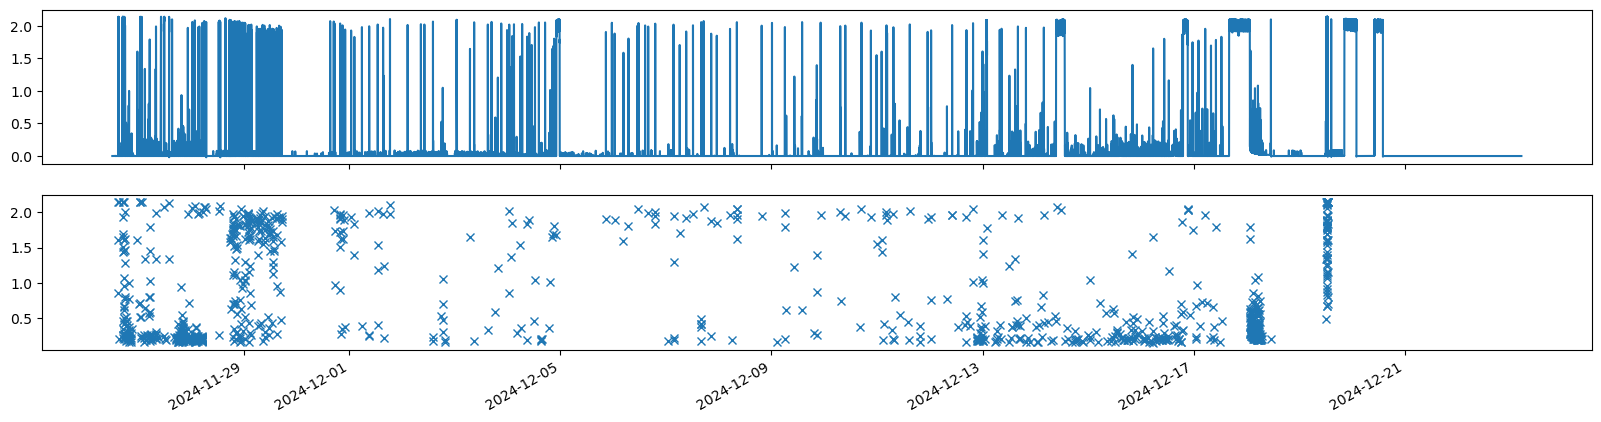

In [34]:
df = df_F0003.copy()

x = df['IMON']

datetime_list = []
datetime_list_peaks = []

peaks, _ = find_peaks(x, threshold=[0.15,None])

for d in df.timestamp:
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

for d in df.timestamp.loc[peaks]:
    datetime_list_peaks.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

print(len(x[peaks])/len(x))


fig, (ax1, ax2) = plt.subplots(2,1, sharex='col', figsize=(20, 5))

ax1.plot(datetime_list,x)
ax2.plot(datetime_list_peaks, x.loc[peaks], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
#ax2.set_yscale('log')

plt.gcf().autofmt_xdate()
plt.show()

0.0037783016282002084


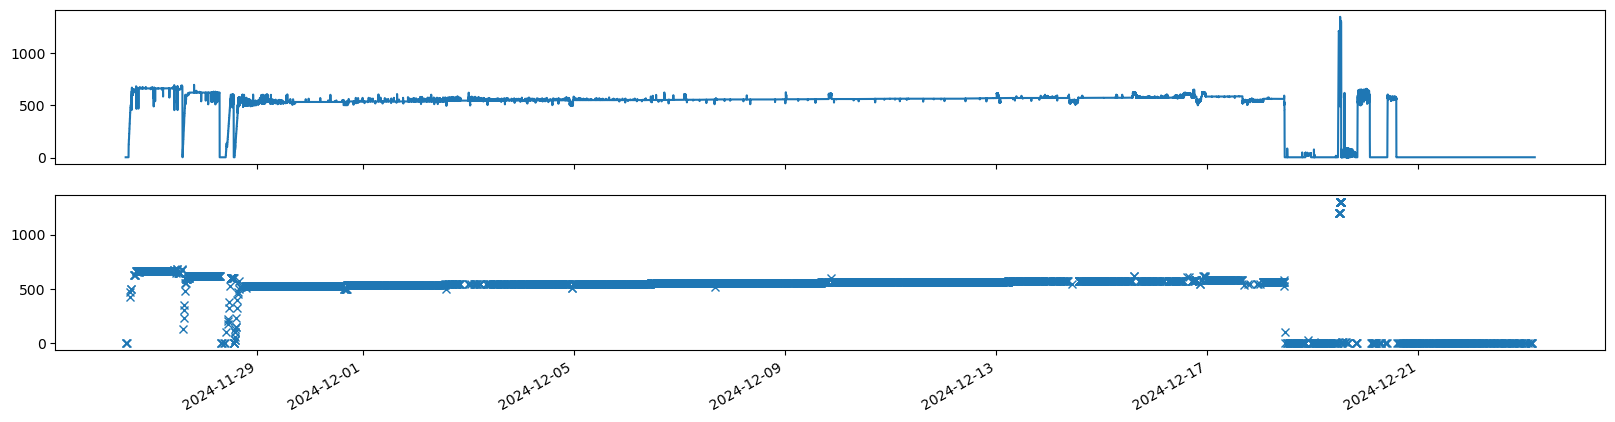

In [35]:
df = df_F0003.copy()

x = df['VMON']

datetime_list = []
datetime_list_peaks = []

peaks, _ = find_peaks(x,threshold=[None,0.14])

for d in df.timestamp:
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

for d in df.timestamp.loc[peaks]:
    datetime_list_peaks.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

print(len(x[peaks])/len(x))


fig, (ax1, ax2) = plt.subplots(2,1, sharex='col', figsize=(20, 5))

ax1.plot(datetime_list,x)
ax2.plot(datetime_list_peaks, x.loc[peaks], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
#ax2.set_yscale('log')

plt.gcf().autofmt_xdate()
plt.show()

#### cuts for charge

In [36]:
# cuts

df = df_F0003.copy()

df = FEA_analysis.cumulated_charge(df)
print(df)

df.loc[df.VMON < 100, 'IMON'] = 0

x = df['IMON']
peaks, _ = find_peaks(x, threshold=[0.15,None])
df= df.drop(peaks)
#df.loc[peaks]['IMON'] = 0
#print(df.loc[peaks]['IMON'])
df = df.reset_index(drop=True)

x = df['VMON']
peaks, _ = find_peaks(x,threshold=[None,0.14])
df = df.drop(peaks)
df = df.reset_index(drop=True)

cum_df_F0003 = FEA_analysis.cumulated_charge(df)

cum_df_F0003

                timestamp      IMON  VMON   VSET  ISET  caen  ch RUP RDW  \
0       24/11/26-12:14:05 -0.000003   2.6    0.0   2.1     1   3  no  no   
1       24/11/26-12:14:07 -0.000013   2.6    0.0   2.1     1   3  no  no   
2       24/11/26-12:14:10 -0.000013   2.6    0.0   2.1     1   3  no  no   
3       24/11/26-12:14:12 -0.000013   2.6    0.0   2.1     1   3  no  no   
4       24/11/26-12:14:15 -0.000013   2.6    0.0   2.1     1   3  no  no   
...                   ...       ...   ...    ...   ...   ...  ..  ..  ..   
912045  24/12/23-05:00:19 -0.000263   2.7  600.0   2.1     1   3  no  no   
912046  24/12/23-05:00:21 -0.000263   2.7  600.0   2.1     1   3  no  no   
912047  24/12/23-05:00:24 -0.000263   2.7  600.0   2.1     1   3  no  no   
912048  24/12/23-05:00:27 -0.000263   2.7  600.0   2.1     1   3  no  no   
912049  24/12/23-05:00:29 -0.000263   2.7  600.0   2.1     1   3  no  no   

            FEA  cumulatedCharge  
0       FEA0003        -0.000006  
1       FEA0003  

,timestamp,IMON,VMON,VSET,ISET,caen,ch,RUP,RDW,FEA,cumulatedCharge
0,24/11/26-12:14:05,0.0,2.6,0.0,2.1,1,3,no,no,FEA0003,0.00000
1,24/11/26-12:14:07,0.0,2.6,0.0,2.1,1,3,no,no,FEA0003,0.00000
2,24/11/26-12:14:10,0.0,2.6,0.0,2.1,1,3,no,no,FEA0003,0.00000
3,24/11/26-12:14:12,0.0,2.6,0.0,2.1,1,3,no,no,FEA0003,0.00000
4,24/11/26-12:14:15,0.0,2.6,0.0,2.1,1,3,no,no,FEA0003,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
907589,24/12/23-05:00:19,0.0,2.7,600.0,2.1,1,3,no,no,FEA0003,172968.95187
907590,24/12/23-05:00:21,0.0,2.7,600.0,2.1,1,3,no,no,FEA0003,172968.95187
907591,24/12/23-05:00:24,0.0,2.7,600.0,2.1,1,3,no,no,FEA0003,172968.95187
907592,24/12/23-05:00:27,0.0,2.7,600.0,2.1,1,3,no,no,FEA0003,172968.95187


#### entire run plot: current + total charge

                timestamp  IMON  VMON   VSET  ISET  caen  ch RUP RDW      FEA  \
0       24/11/26-12:14:05   0.0   2.6    0.0   2.1     1   3  no  no  FEA0003   
1       24/11/26-12:14:07   0.0   2.6    0.0   2.1     1   3  no  no  FEA0003   
2       24/11/26-12:14:10   0.0   2.6    0.0   2.1     1   3  no  no  FEA0003   
3       24/11/26-12:14:12   0.0   2.6    0.0   2.1     1   3  no  no  FEA0003   
4       24/11/26-12:14:15   0.0   2.6    0.0   2.1     1   3  no  no  FEA0003   
...                   ...   ...   ...    ...   ...   ...  ..  ..  ..      ...   
907589  24/12/23-05:00:19   0.0   2.7  600.0   2.1     1   3  no  no  FEA0003   
907590  24/12/23-05:00:21   0.0   2.7  600.0   2.1     1   3  no  no  FEA0003   
907591  24/12/23-05:00:24   0.0   2.7  600.0   2.1     1   3  no  no  FEA0003   
907592  24/12/23-05:00:27   0.0   2.7  600.0   2.1     1   3  no  no  FEA0003   
907593  24/12/23-05:00:29   0.0   2.7  600.0   2.1     1   3  no  no  FEA0003   

        cumulatedCharge  
0

<Figure size 1280x960 with 0 Axes>

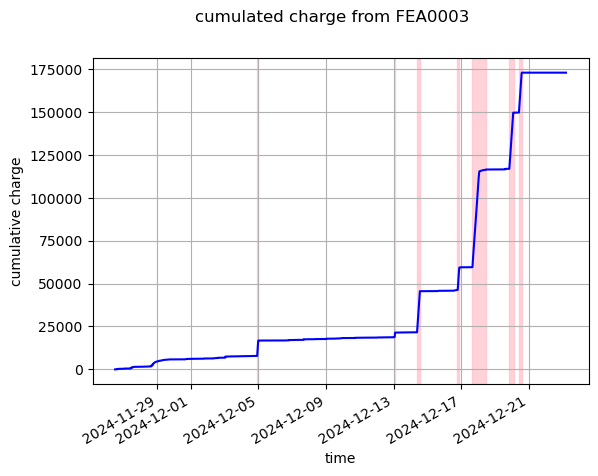

In [37]:
df = cum_df_F0003.copy()
print(cum_df_F0003)

plt.figure(dpi=200)
fig, ax1 = plt.subplots(1,1, sharex='col')

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df['cumulatedCharge'].tolist(),'-',color='blue',  label= 'cumulative charge', markersize=1)

ts1 = '24/12/16-18:30:11'
te1 = '24/12/16-21:30:21'
ax1.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts2 = '24/12/19-20:00:11'
te2 = '24/12/20-02:30:21'
ax1.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts3 = '24/12/17-15:00:11'
te3 = '24/12/18-11:00:21'
ax1.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts4 = '24/12/14-09:10:11'
te4 = '24/12/14-13:30:21'
ax1.axvspan(datetime.strptime(ts4, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te4, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts5 = '24/12/13-01:30:11'
te5 = '24/12/13-02:05:21'
ax1.axvspan(datetime.strptime(ts5, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te5, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts6 = '24/12/04-22:00:11'
te6 = '24/12/04-23:45:21'
ax1.axvspan(datetime.strptime(ts6, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te6, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts7 = '24/12/20-10:00:11'
te7 = '24/12/20-14:10:21'
ax1.axvspan(datetime.strptime(ts7, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te7, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

fig.suptitle(f'cumulated charge from {FEA_name}')
ax1.set_ylabel('cumulative charge')
ax1.set_xlabel('time')
ax1.grid()


#print(df_cut['timestamp'].loc[df_cut['cumulatedCharge'] == max(df_cut['cumulatedCharge'])])

#annot_max(df_cut)

plt.gcf().autofmt_xdate()


print(1 - len(df['timestamp'])/len(df_F0003['timestamp']))

603608    568.0
Name: VSET, dtype: float64


<Figure size 1280x960 with 0 Axes>

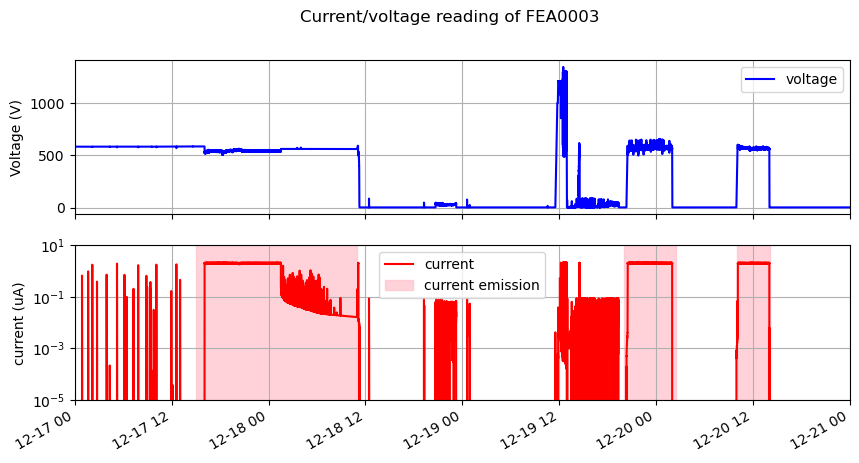

In [38]:
# plot of the entire run

from datetime import date

df = df_F0003.copy()

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col', figsize=(10, 5))

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df['VMON'].tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(datetime_list, df['IMON'].tolist(),'-',color='red', label='current', markersize=1)
#ax1.plot(datetime_list, df.VSET.tolist(), '--', color='darkgrey', label='VSET')

print(df.VSET.loc[df['timestamp'] == '24/12/14-09:10:11'])

# time period with current emission
ts1 = '24/12/16-18:30:11'
te1 = '24/12/16-21:30:21'
ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts2 = '24/12/19-20:00:11'
te2 = '24/12/20-02:30:21'
ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts3 = '24/12/17-15:00:11'
te3 = '24/12/18-11:00:21'
ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts4 = '24/12/14-09:10:11'
te4 = '24/12/14-13:30:21'
ax2.axvspan(datetime.strptime(ts4, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te4, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts5 = '24/12/13-01:30:11'
te5 = '24/12/13-02:05:21'
ax2.axvspan(datetime.strptime(ts5, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te5, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts7 = '24/12/20-10:00:11'
te7 = '24/12/20-14:10:21'
ax2.axvspan(datetime.strptime(ts7, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te7, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f"Current/voltage reading of {FEA_name}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(2000)
ax2.set_ylim([1e-5, 10])

ax1.set_xlim([date(2024,12,17), date(2024,12,21)])

ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()

#plt.savefig("FEA0003_CVplot_Cpeak", format='jpg')
plt.show()

603608    568.0
Name: VSET, dtype: float64


<Figure size 1280x960 with 0 Axes>

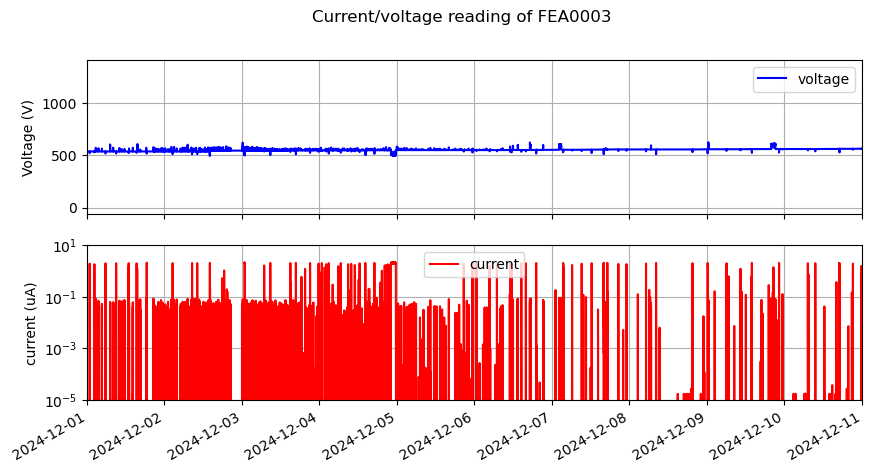

In [39]:
# plot of the entire run

from datetime import date

df = df_F0003.copy()

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col', figsize=(10, 5))

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df['VMON'].tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(datetime_list, df['IMON'].tolist(),'-',color='red', label='current', markersize=1)
#ax1.plot(datetime_list, df.VSET.tolist(), '--', color='darkgrey', label='VSET')

print(df.VSET.loc[df['timestamp'] == '24/12/14-09:10:11'])

# time period with current emission
ts1 = '24/12/16-18:30:11'
te1 = '24/12/16-21:30:21'
ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts2 = '24/12/19-20:00:11'
te2 = '24/12/20-02:30:21'
#ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts3 = '24/12/17-15:00:11'
te3 = '24/12/18-11:00:21'
ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts4 = '24/12/14-09:10:11'
te4 = '24/12/14-13:30:21'
ax2.axvspan(datetime.strptime(ts4, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te4, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts5 = '24/12/13-01:30:11'
te5 = '24/12/13-02:05:21'
ax2.axvspan(datetime.strptime(ts5, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te5, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts7 = '24/12/20-10:00:11'
te7 = '24/12/20-14:10:21'
ax2.axvspan(datetime.strptime(ts7, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te7, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f"Current/voltage reading of {FEA_name}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])

ax1.set_xlim([date(2024,12,1), date(2024,12,11)])

ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()

#plt.savefig("FEA0003_CVplot_Cpeak", format='jpg')
plt.show()

#### power plot

0        -7.744681e-12
1        -3.374468e-11
2        -3.374468e-11
3        -3.374468e-11
4        -3.374468e-11
              ...     
912045   -7.100426e-10
912046   -7.100426e-10
912047   -7.100426e-10
912048   -7.100426e-10
912049   -7.100426e-10
Length: 912050, dtype: float64


<Figure size 1280x960 with 0 Axes>

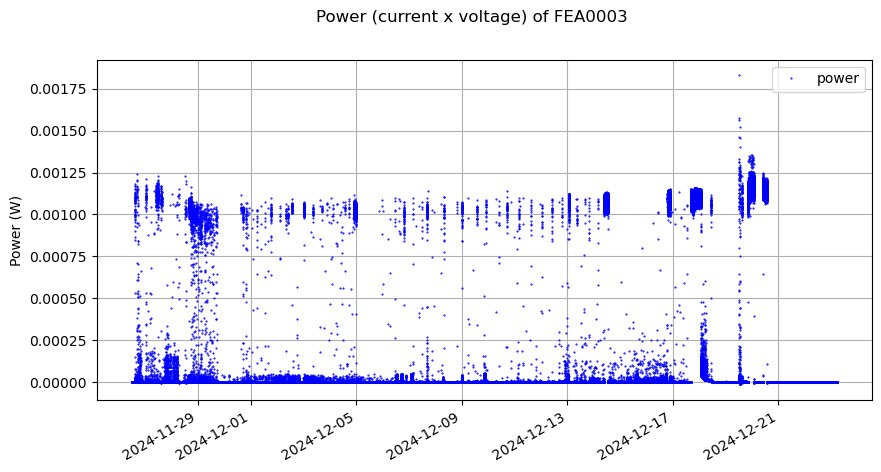

In [40]:
from datetime import date

df = df_F0003.copy()

plt.figure(dpi=200)
fig, ax1 = plt.subplots(1,1, sharex='col', figsize=(10, 5))

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

power = df.VMON * df.IMON * 1e-6
print(power)

ax1.plot(datetime_list, power,'.',color='blue',  label= 'power', markersize=1)

# time period with current emission
ts1 = '24/12/19-14:40:11'
te1 = '24/12/19-15:15:21'
#ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-11:55:11'
te2 = '24/12/19-12:30:21'
#ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts3 = '24/09/09-08:35:11'
te3 = '24/09/09-20:18:21'
#ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f"Power (current x voltage) of {FEA_name}")
ax1.set_ylabel('Power (W)')
#ax1.set_yscale('log')
#ax1.set_ylim(300)
#ax1.set_xlim([date(2024,11,26), date(2024,12,21)])

ax1.grid()
ax1.legend()

plt.gcf().autofmt_xdate()
plt.show()

#### partial plot

current used to baseline correction is -5.49945906961436e-08


<Figure size 1280x960 with 0 Axes>

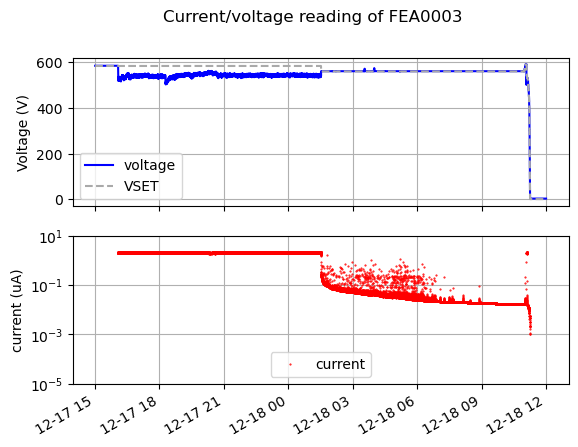

In [41]:
t_start = '24/12/17-15:00:11'
t_end = '24/12/18-12:00:21'

t_start_base = '24/11/26-12:30:01'
t_end_base = '24/11/26-12:40:00'

new_df_F0003 = FEA_analysis.partial_charge(df_F0003, t_start, t_end, t_start_base, t_end_base)
new_df_F0003.loc[new_df_F0003['ch']==3, 'FEA'] = FEA[0]

new_df_F0003

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0003

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)
ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label='VSET')

fig.suptitle(f"Current/voltage reading of {df.FEA[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()

current used to baseline correction is 6.460420784142969e-23


<Figure size 1280x960 with 0 Axes>

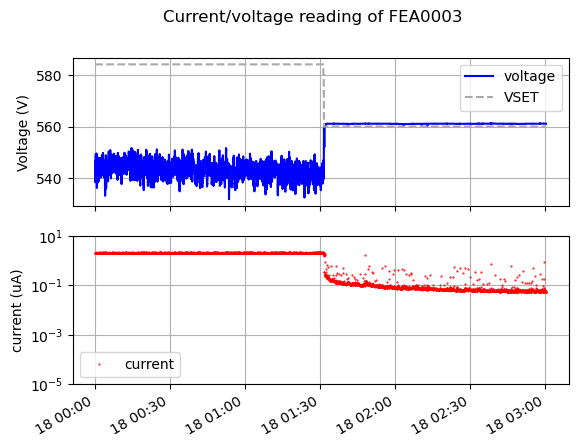

In [42]:
t_start = '24/12/18-00:00:11'
t_end = '24/12/18-03:00:21'

t_start_base = '24/11/26-12:30:01'
t_end_base = '24/11/26-12:40:00'

new_df_F0003 = FEA_analysis.partial_charge(df_F0003, t_start, t_end, t_start_base, t_end_base)
new_df_F0003.loc[new_df_F0003['ch']==3, 'FEA'] = FEA[0]

new_df_F0003

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0003

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)
ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label='VSET')

fig.suptitle(f"Current/voltage reading of {df.FEA[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()

current used to baseline correction is 6.460420784142969e-23


<Figure size 1280x960 with 0 Axes>

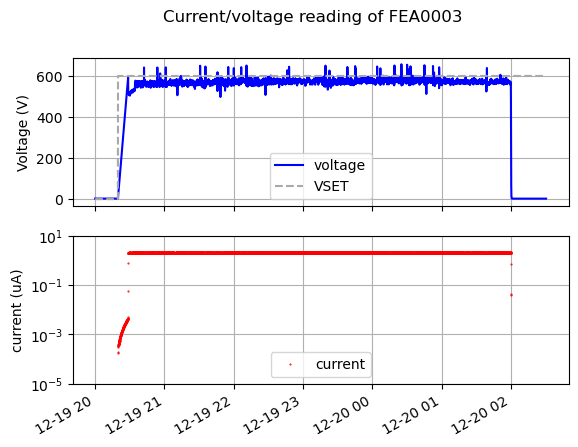

In [43]:
t_start = '24/12/19-20:00:11'
t_end = '24/12/20-02:30:21'

t_start_base = '24/11/26-12:30:01'
t_end_base = '24/11/26-12:40:00'

new_df_F0003 = FEA_analysis.partial_charge(df_F0003, t_start, t_end, t_start_base, t_end_base)
new_df_F0003.loc[new_df_F0003['ch']==3, 'FEA'] = FEA[0]

new_df_F0003

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0003

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)
ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label='VSET')


fig.suptitle(f"Current/voltage reading of {df.FEA[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()

current used to baseline correction is 6.460420784142969e-23


<Figure size 1280x960 with 0 Axes>

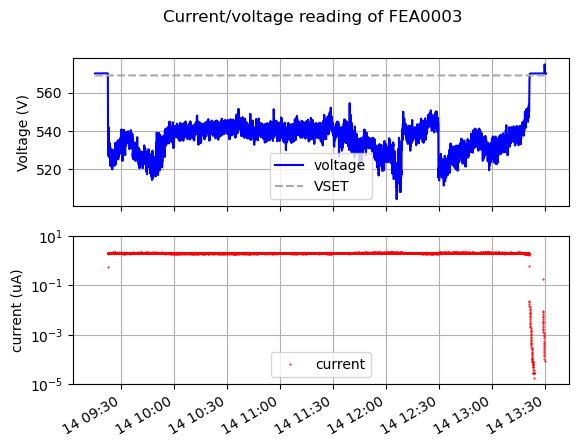

In [44]:
t_start = '24/12/14-09:15:11'
t_end = '24/12/14-13:30:21'

t_start_base = '24/11/26-12:30:01'
t_end_base = '24/11/26-12:40:00'

new_df_F0003 = FEA_analysis.partial_charge(df_F0003, t_start, t_end, t_start_base, t_end_base)
new_df_F0003.loc[new_df_F0003['ch']==3, 'FEA'] = FEA[0]

new_df_F0003

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0003

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)
ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label='VSET')
#ax1.axhline(mean(df.VMON), linestyle= ':', label = 'VMON avg')


fig.suptitle(f"Current/voltage reading of {df.FEA[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()
plt.savefig("FEA0003_CVplot_recovering.jpg", format='jpg')

### FEA 0004

#### cuts

In [45]:
# cuts

df = df_F0004_neg.copy()

df = FEA_analysis.cumulated_charge(df)
print(df)

df.loc[df.VMON < 100, 'IMON'] = 0

x = df['IMON']
peaks, _ = find_peaks(x, threshold=[0.15,None])
df= df.drop(peaks)
#df.loc[peaks]['IMON'] = 0
#print(df.loc[peaks]['IMON'])
df = df.reset_index(drop=True)

x = df['VMON']
peaks, _ = find_peaks(x,threshold=[None,0.14])
df = df.drop(peaks)
df = df.reset_index(drop=True)

cum_df_F0004_neg = FEA_analysis.cumulated_charge(df)

cum_df_F0004_neg

                timestamp      IMON  VMON    VSET  ISET  caen  ch RUP RDW  \
0       24/11/26-12:14:03 -0.000004  1.55     0.0   2.1     2   3  no  no   
1       24/11/26-12:14:06 -0.000014  1.55     0.0   2.1     2   3  no  no   
2       24/11/26-12:14:09 -0.000034  1.55     0.0   2.1     2   3  no  no   
3       24/11/26-12:14:11 -0.000044  1.55     0.0   2.1     2   3  no  no   
4       24/11/26-12:14:14 -0.000064  1.55     0.0   2.1     2   3  no  no   
...                   ...       ...   ...     ...   ...   ...  ..  ..  ..   
904811  24/12/23-05:00:18  0.001866  2.25  1200.0   2.1     2   3  no  no   
904812  24/12/23-05:00:21  0.001856  2.25  1200.0   2.1     2   3  no  no   
904813  24/12/23-05:00:23  0.001846  2.25  1200.0   2.1     2   3  no  no   
904814  24/12/23-05:00:26  0.001856  2.25  1200.0   2.1     2   3  no  no   
904815  24/12/23-05:00:28  0.001866  2.25  1200.0   2.1     2   3  no  no   

            FEA  cumulatedCharge  
0       FEA0004        -0.000007  
1    

,timestamp,IMON,VMON,VSET,ISET,caen,ch,RUP,RDW,FEA,cumulatedCharge
0,24/11/26-12:14:03,0.0,1.55,0.0,2.1,2,3,no,no,FEA0004,0.000000
1,24/11/26-12:14:06,0.0,1.55,0.0,2.1,2,3,no,no,FEA0004,0.000000
2,24/11/26-12:14:09,0.0,1.55,0.0,2.1,2,3,no,no,FEA0004,0.000000
3,24/11/26-12:14:11,0.0,1.55,0.0,2.1,2,3,no,no,FEA0004,0.000000
4,24/11/26-12:14:14,0.0,1.55,0.0,2.1,2,3,no,no,FEA0004,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
901184,24/12/23-05:00:18,0.0,2.25,1200.0,2.1,2,3,no,no,FEA0004,11953.862291
901185,24/12/23-05:00:21,0.0,2.25,1200.0,2.1,2,3,no,no,FEA0004,11953.862291
901186,24/12/23-05:00:23,0.0,2.25,1200.0,2.1,2,3,no,no,FEA0004,11953.862291
901187,24/12/23-05:00:26,0.0,2.25,1200.0,2.1,2,3,no,no,FEA0004,11953.862291


#### charge plot

0.14983267316227833


<Figure size 1280x960 with 0 Axes>

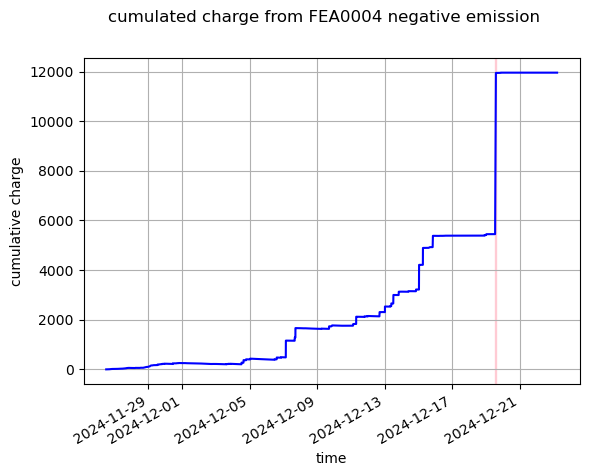

In [46]:
df = cum_df_F0004_neg.copy()

x = df['IMON']
peaks, _ = find_peaks(x)
df_cut= df.drop(peaks)
df_cut = df_cut.reset_index(drop=True)

x = df_cut['VMON']
peaks, _ = find_peaks(x)
df_cut = df_cut.drop(peaks)
df_cut = df_cut.reset_index(drop=True)

plt.figure(dpi=200)
fig, ax1 = plt.subplots(1,1, sharex='col')

FEA_name = df_cut.FEA.iloc[0]

datetime_list = []
for d in df_cut.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df_cut['cumulatedCharge'].tolist(),'-',color='blue',  label= 'cumulative charge', markersize=1)

ts1 = '24/12/19-12:50:11'
te1 = '24/12/19-14:05:21'
ax1.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-20:00:11'
te2 = '24/12/20-02:30:21'
#ax1.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f'cumulated charge from {FEA_name} negative emission')
ax1.set_ylabel('cumulative charge')
ax1.set_xlabel('time')
ax1.grid()

plt.gcf().autofmt_xdate()


print(1 - len(df_cut['timestamp'])/len(df_F0004_neg['timestamp']))

#### entire run

<Figure size 640x480 with 0 Axes>

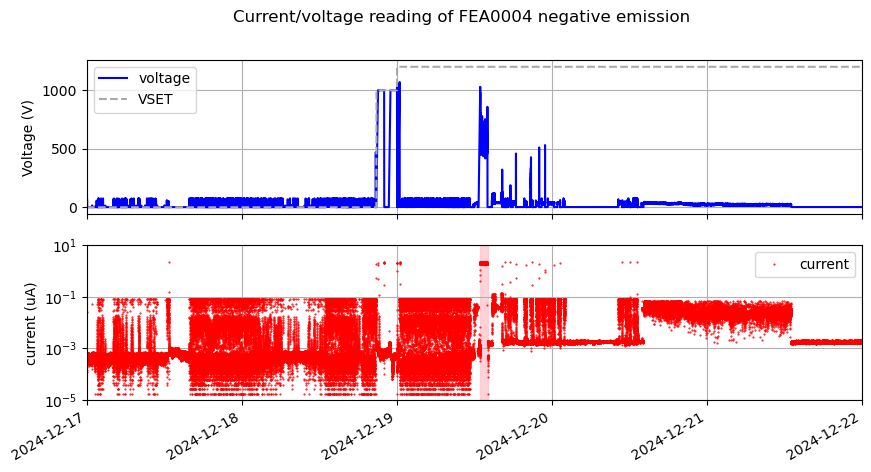

In [47]:
# plot of the entire run
from datetime import date

df = df_F0004_neg.copy()

plt.figure()
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col', figsize=(10, 5))

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df['VMON'].tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(datetime_list, df['IMON'].tolist(),'.',color='red', label='current', markersize=1)
ax1.plot(datetime_list, df.VSET.tolist(), '--', color='darkgrey', label='VSET')

# time period with current emission
ts1 = '24/12/19-12:50:11'
te1 = '24/12/19-14:05:21'
ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts2 = '24/12/05-09:35:11'
te2 = '24/12/19-16:18:21'
#ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts3 = '24/09/09-08:35:11'
te3 = '24/09/09-20:18:21'
#ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f"Current/voltage reading of {FEA_name} negative emission")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])

ax1.set_xlim([date(2024,12,17), date(2024,12,22)])

ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()
plt.show()

#### power plot

0        -5.606383e-12
1        -2.110638e-11
2        -5.210638e-11
3        -6.760638e-11
4        -9.860638e-11
              ...     
904811    4.199362e-09
904812    4.176862e-09
904813    4.154362e-09
904814    4.176862e-09
904815    4.199362e-09
Length: 904816, dtype: float64


<Figure size 1280x960 with 0 Axes>

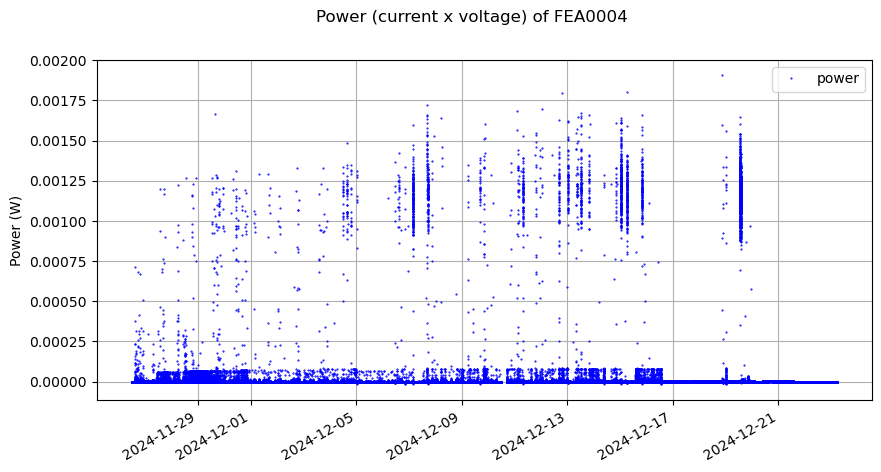

In [48]:
from datetime import date

df = df_F0004_neg.copy()

plt.figure(dpi=200)
fig, ax1 = plt.subplots(1,1, sharex='col', figsize=(10, 5))

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

power = df.VMON * df.IMON * 1e-6
print(power)

ax1.plot(datetime_list, power,'.',color='blue',  label= 'power', markersize=1)

# time period with current emission
ts1 = '24/12/19-14:40:11'
te1 = '24/12/19-15:15:21'
#ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-11:55:11'
te2 = '24/12/19-12:30:21'
#ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts3 = '24/09/09-08:35:11'
te3 = '24/09/09-20:18:21'
#ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f"Power (current x voltage) of {FEA_name}")
ax1.set_ylabel('Power (W)')
#ax1.set_yscale('log')
#ax1.set_ylim(300)
#ax1.set_xlim([date(2024,11,26), date(2024,12,21)])

ax1.grid()
ax1.legend()

plt.gcf().autofmt_xdate()
plt.show()

#### partial plot (negative)

current used to baseline correction is -3.119365308332955e-07


<Figure size 1280x960 with 0 Axes>

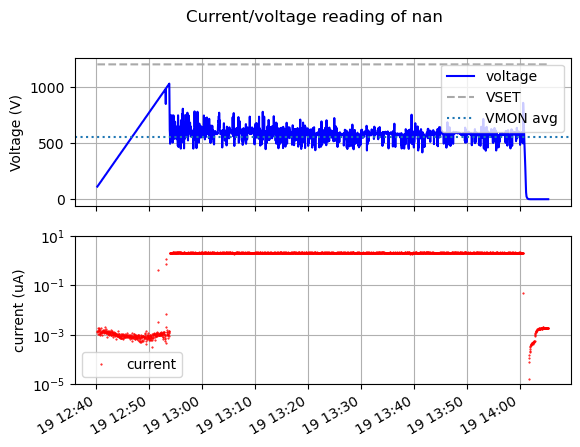

In [49]:
t_start = '24/12/19-12:40:11'
t_end = '24/12/19-14:05:21'

t_start_base = '24/11/26-12:30:01'
t_end_base = '24/11/26-12:40:00'

new_df_F0004_neg = FEA_analysis.partial_charge(df_F0004_neg, t_start, t_end, t_start_base, t_end_base)
new_df_F0004_neg.loc[new_df_F0004_neg['ch']==2, 'FEA'] = FEA[1]

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0004_neg

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)
ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label='VSET')
ax1.axhline(mean(df.VMON.tolist()), linestyle= ':', label = 'VMON avg')

fig.suptitle(f"Current/voltage reading of {df.FEA[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()


#### positive emission

In [50]:
# cuts

df = df_F0004_pos.copy()

df = FEA_analysis.cumulated_charge(df)
print(df)

df.loc[df.VMON < 100, 'IMON'] = 0

x = df['IMON']
peaks, _ = find_peaks(x, threshold=[0.15,None])
df= df.drop(peaks)
#df.loc[peaks]['IMON'] = 0
#print(df.loc[peaks]['IMON'])
df = df.reset_index(drop=True)

x = df['VMON']
peaks, _ = find_peaks(x,threshold=[None,0.14])
df = df.drop(peaks)
df = df.reset_index(drop=True)

cum_df_F0004_pos = FEA_analysis.cumulated_charge(df)

cum_df_F0004_pos

                timestamp      IMON  VMON    VSET  ISET  caen  ch RUP RDW  \
0       24/11/26-12:14:03  0.000009  2.00    20.0   2.1     2   0  no  no   
1       24/11/26-12:14:06  0.000009  2.00    20.0   2.1     2   0  no  no   
2       24/11/26-12:14:09  0.000009  2.00    20.0   2.1     2   0  no  no   
3       24/11/26-12:14:11  0.000009  2.00    20.0   2.1     2   0  no  no   
4       24/11/26-12:14:14  0.000019  2.00    20.0   2.1     2   0  no  no   
...                   ...       ...   ...     ...   ...   ...  ..  ..  ..   
904812  24/12/23-05:00:18 -0.000891  1.55  1060.0   2.1     2   0  no  no   
904813  24/12/23-05:00:21 -0.000891  1.55  1060.0   2.1     2   0  no  no   
904814  24/12/23-05:00:23 -0.000891  1.55  1060.0   2.1     2   0  no  no   
904815  24/12/23-05:00:26 -0.000891  1.55  1060.0   2.1     2   0  no  no   
904816  24/12/23-05:00:28 -0.000891  1.55  1060.0   2.1     2   0  no  no   

            FEA  cumulatedCharge  
0       FEA0004         0.000017  
1    

,timestamp,IMON,VMON,VSET,ISET,caen,ch,RUP,RDW,FEA,cumulatedCharge
0,24/11/26-12:14:03,0.0,2.00,20.0,2.1,2,0,no,no,FEA0004,0.000000
1,24/11/26-12:14:06,0.0,2.00,20.0,2.1,2,0,no,no,FEA0004,0.000000
2,24/11/26-12:14:09,0.0,2.00,20.0,2.1,2,0,no,no,FEA0004,0.000000
3,24/11/26-12:14:11,0.0,2.00,20.0,2.1,2,0,no,no,FEA0004,0.000000
4,24/11/26-12:14:14,0.0,2.00,20.0,2.1,2,0,no,no,FEA0004,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
903873,24/12/23-05:00:18,0.0,1.55,1060.0,2.1,2,0,no,no,FEA0004,143774.192982
903874,24/12/23-05:00:21,0.0,1.55,1060.0,2.1,2,0,no,no,FEA0004,143774.192982
903875,24/12/23-05:00:23,0.0,1.55,1060.0,2.1,2,0,no,no,FEA0004,143774.192982
903876,24/12/23-05:00:26,0.0,1.55,1060.0,2.1,2,0,no,no,FEA0004,143774.192982


#### charge plot

NameError: name 'df_F0004' is not defined

<Figure size 1280x960 with 0 Axes>

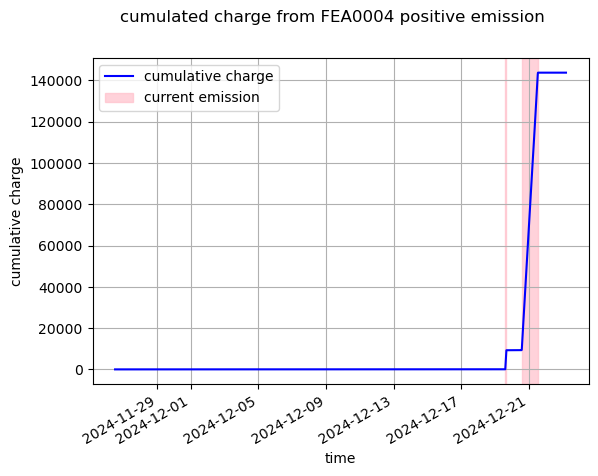

In [51]:
df = cum_df_F0004_pos.copy()

x = df['IMON']
peaks, _ = find_peaks(x)
df_cut= df.drop(peaks)
df_cut = df_cut.reset_index(drop=True)

x = df_cut['VMON']
peaks, _ = find_peaks(x)
df_cut = df_cut.drop(peaks)
df_cut = df_cut.reset_index(drop=True)

plt.figure(dpi=200)
fig, ax1 = plt.subplots(1,1, sharex='col')

FEA_name = df_cut.FEA.iloc[0]

datetime_list = []
for d in df_cut.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df_cut['cumulatedCharge'].tolist(),'-',color='blue',  label= 'cumulative charge', markersize=1)

ts1 = '24/12/20-13:50:11'
te1 = '24/12/21-13:20:21'
ax1.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-14:38:11'
te2 = '24/12/19-16:25:21'
ax1.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f'cumulated charge from {FEA_name} positive emission')
ax1.set_ylabel('cumulative charge')
ax1.set_xlabel('time')
ax1.legend()
ax1.grid()

plt.gcf().autofmt_xdate()


print(1 - len(df_cut['timestamp'])/len(df_F0004['timestamp']))

#### entire plot

<Figure size 1280x960 with 0 Axes>

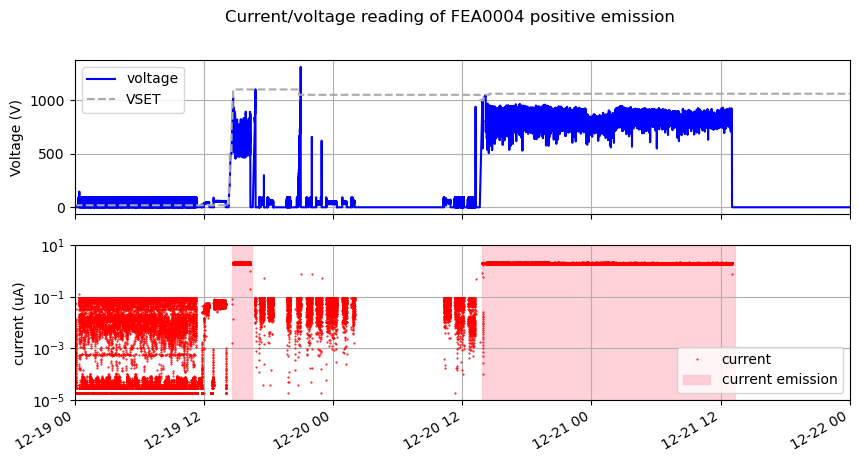

In [ ]:
# plot of the entire run
from datetime import date
df = df_F0004_pos.copy()

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col', figsize=(10, 5))

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df['VMON'].tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(datetime_list, df['IMON'].tolist(),'.',color='red', label='current', markersize=1)
ax1.plot(datetime_list, df.VSET.tolist(), '--', color='darkgrey', label='VSET')

# time period with current emission
ts1 = '24/12/20-13:50:11'
te1 = '24/12/21-13:20:21'
ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-14:38:11'
te2 = '24/12/19-16:25:21'
ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts3 = '24/09/09-08:35:11'
te3 = '24/09/09-20:18:21'
#ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f"Current/voltage reading of {FEA_name} positive emission")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])

ax1.set_xlim([date(2024,12,19), date(2024,12,22)])

ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend(loc='lower right')

plt.gcf().autofmt_xdate()
plt.show()

#### power plot

0         1.711864e-11
1         1.711864e-11
2         1.711864e-11
3         1.711864e-11
4         3.711864e-11
              ...     
904812   -1.381733e-09
904813   -1.381733e-09
904814   -1.381733e-09
904815   -1.381733e-09
904816   -1.381733e-09
Length: 904817, dtype: float64


<Figure size 1280x960 with 0 Axes>

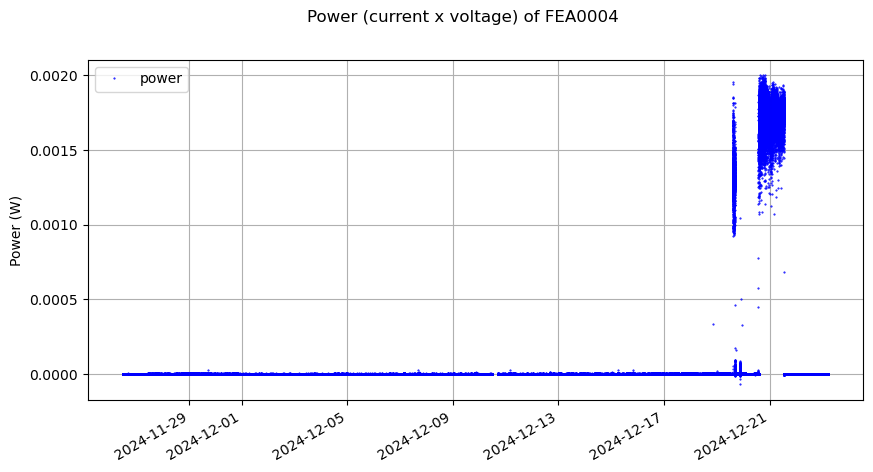

In [81]:
from datetime import date

df = df_F0004_pos.copy()

plt.figure(dpi=200)
fig, ax1 = plt.subplots(1,1, sharex='col', figsize=(10, 5))

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

power = df.VMON * df.IMON * 1e-6
print(power)

ax1.plot(datetime_list, power,'.',color='blue',  label= 'power', markersize=1)

# time period with current emission
ts1 = '24/12/19-14:40:11'
te1 = '24/12/19-15:15:21'
#ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-11:55:11'
te2 = '24/12/19-12:30:21'
#ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts3 = '24/09/09-08:35:11'
te3 = '24/09/09-20:18:21'
#ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f"Power (current x voltage) of {FEA_name}")
ax1.set_ylabel('Power (W)')
#ax1.set_yscale('log')
#ax1.set_ylim(300)
#ax1.set_xlim([date(2024,11,26), date(2024,12,21)])

ax1.grid()
ax1.legend()

plt.gcf().autofmt_xdate()
plt.show()

#### partial plot (positive)

current used to baseline correction is 3.64226469527712e-08


<Figure size 1280x960 with 0 Axes>

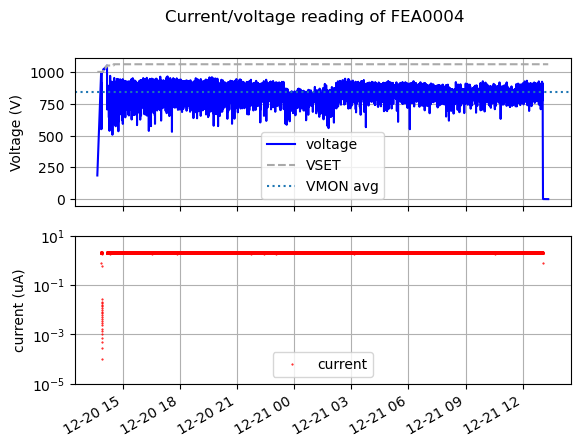

In [ ]:

t_start = '24/12/20-13:40:11'
t_end = '24/12/21-13:20:21'

t_start_base = '24/11/26-12:30:01'
t_end_base = '24/11/26-12:40:00'

new_df_F0004_pos = FEA_analysis.partial_charge(df_F0004_pos, t_start, t_end, t_start_base, t_end_base)
new_df_F0004_pos.loc[new_df_F0004_pos['ch']==0, 'FEA'] = FEA[1]

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0004_pos

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)
ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label='VSET')
ax1.axhline(mean(df.VMON.tolist()), linestyle= ':', label = 'VMON avg')

fig.suptitle(f"Current/voltage reading of {df.FEA[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()

### FEA 0005

In [ ]:
# cuts

df = df_F0005.copy()

df = FEA_analysis.cumulated_charge(df)
print(df)

df.loc[df.VMON < 100, 'IMON'] = 0

x = df['IMON']
peaks, _ = find_peaks(x, threshold=[0.15,None])
df= df.drop(peaks)
#df.loc[peaks]['IMON'] = 0
#print(df.loc[peaks]['IMON'])
df = df.reset_index(drop=True)

x = df['VMON']
peaks, _ = find_peaks(x,threshold=[None,0.14])
df = df.drop(peaks)
df = df.reset_index(drop=True)

cum_df_F0005 = FEA_analysis.cumulated_charge(df)

cum_df_F0005

                timestamp      IMON  VMON   VSET  ISET  caen  ch RUP RDW  \
0       24/11/26-12:14:05  0.000031  1.85    0.0   2.1     1   2  no  no   
1       24/11/26-12:14:07  0.000031  1.85    0.0   2.1     1   2  no  no   
2       24/11/26-12:14:10  0.000031  1.85    0.0   2.1     1   2  no  no   
3       24/11/26-12:14:12  0.000031  1.85    0.0   2.1     1   2  no  no   
4       24/11/26-12:14:15  0.000021  1.85    0.0   2.1     1   2  no  no   
...                   ...       ...   ...    ...   ...   ...  ..  ..  ..   
912045  24/12/23-05:00:19 -0.000519  1.80  910.0   2.1     1   2  no  no   
912046  24/12/23-05:00:21 -0.000519  1.80  910.0   2.1     1   2  no  no   
912047  24/12/23-05:00:24 -0.000519  1.80  910.0   2.1     1   2  no  no   
912048  24/12/23-05:00:27 -0.000519  1.80  910.0   2.1     1   2  no  no   
912049  24/12/23-05:00:29 -0.000519  1.80  910.0   2.1     1   2  no  no   

            FEA  cumulatedCharge  
0       FEA0005         0.000062  
1       FEA0005  

,timestamp,IMON,VMON,VSET,ISET,caen,ch,RUP,RDW,FEA,cumulatedCharge
0,24/11/26-12:14:05,0.0,1.85,0.0,2.1,1,2,no,no,FEA0005,0.000000
1,24/11/26-12:14:07,0.0,1.85,0.0,2.1,1,2,no,no,FEA0005,0.000000
2,24/11/26-12:14:10,0.0,1.85,0.0,2.1,1,2,no,no,FEA0005,0.000000
3,24/11/26-12:14:12,0.0,1.85,0.0,2.1,1,2,no,no,FEA0005,0.000000
4,24/11/26-12:14:15,0.0,1.85,0.0,2.1,1,2,no,no,FEA0005,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
903100,24/12/23-05:00:19,0.0,1.80,910.0,2.1,1,2,no,no,FEA0005,174093.675646
903101,24/12/23-05:00:21,0.0,1.80,910.0,2.1,1,2,no,no,FEA0005,174093.675646
903102,24/12/23-05:00:24,0.0,1.80,910.0,2.1,1,2,no,no,FEA0005,174093.675646
903103,24/12/23-05:00:27,0.0,1.80,910.0,2.1,1,2,no,no,FEA0005,174093.675646


#### charge plot

0.10099446302286064


<Figure size 1280x960 with 0 Axes>

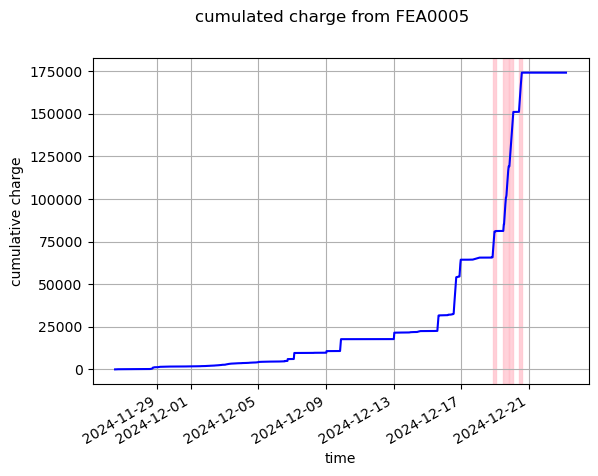

In [ ]:
df = cum_df_F0005.copy()

x = df['IMON']
peaks, _ = find_peaks(x)
df_cut= df.drop(peaks)
df_cut = df_cut.reset_index(drop=True)

x = df_cut['VMON']
peaks, _ = find_peaks(x)
df_cut = df_cut.drop(peaks)
df_cut = df_cut.reset_index(drop=True)

plt.figure(dpi=200)
fig, ax1 = plt.subplots(1,1, sharex='col')

FEA_name = df_cut.FEA.iloc[0]

datetime_list = []
for d in df_cut.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df_cut['cumulatedCharge'].tolist(),'-',color='blue',  label= 'cumulative charge', markersize=1)

ts1 = '24/12/18-20:35:11'
te1 = '24/12/19-01:18:21'
ax1.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-11:35:11'
te2 = '24/12/19-19:45:21'
ax1.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts3 = '24/12/19-20:15:11'
te3 = '24/12/20-02:20:21'
ax1.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts4 = '24/12/20-10:00:11'
te4 = '24/12/20-14:10:21'
ax1.axvspan(datetime.strptime(ts4, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te4, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

fig.suptitle(f'cumulated charge from {FEA_name}')
ax1.set_ylabel('cumulative charge')
ax1.set_xlabel('time')
ax1.grid()

plt.gcf().autofmt_xdate()


print(1 - len(df_cut['timestamp'])/len(df_F0005['timestamp']))

#### entire plot

<Figure size 1280x960 with 0 Axes>

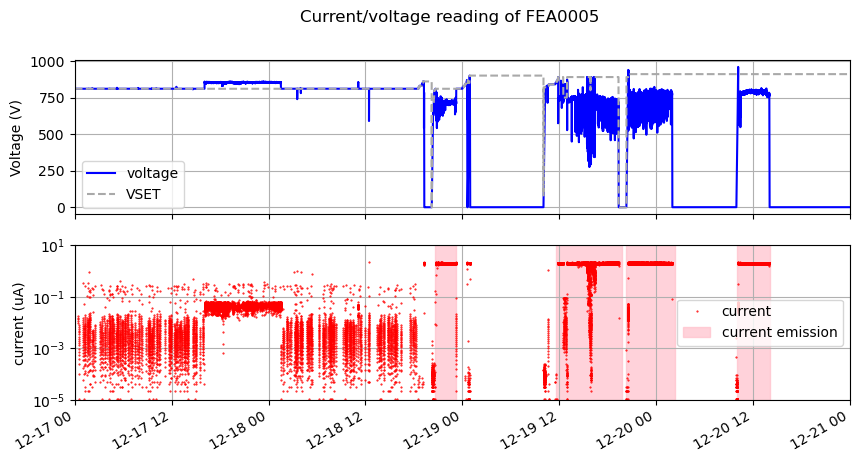

In [ ]:
# plot of the entire run
from datetime import date
df = df_F0005

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col', figsize=(10, 5))

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df['VMON'].tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(datetime_list, df['IMON'].tolist(),'.',color='red', label='current', markersize=1)
ax1.plot(datetime_list, df.VSET.tolist(), '--', color='darkgrey', label='VSET')

# time period with current emission
ts1 = '24/12/18-20:35:11'
te1 = '24/12/18-23:15:21'
ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-11:35:11'
te2 = '24/12/19-19:45:21'
ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts3 = '24/12/19-20:15:11'
te3 = '24/12/20-02:20:21'
ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts4 = '24/12/20-10:00:11'
te4 = '24/12/20-14:10:21'
ax2.axvspan(datetime.strptime(ts4, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te4, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')



fig.suptitle(f"Current/voltage reading of {FEA_name}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.set_xlim([date(2024,12,17), date(2024,12,21)])

ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()
plt.show()

#### power plot

0         5.785169e-11
1         5.785169e-11
2         5.785169e-11
3         5.785169e-11
4         3.935169e-11
              ...     
912045   -9.337119e-10
912046   -9.337119e-10
912047   -9.337119e-10
912048   -9.337119e-10
912049   -9.337119e-10
Length: 912050, dtype: float64


<Figure size 1280x960 with 0 Axes>

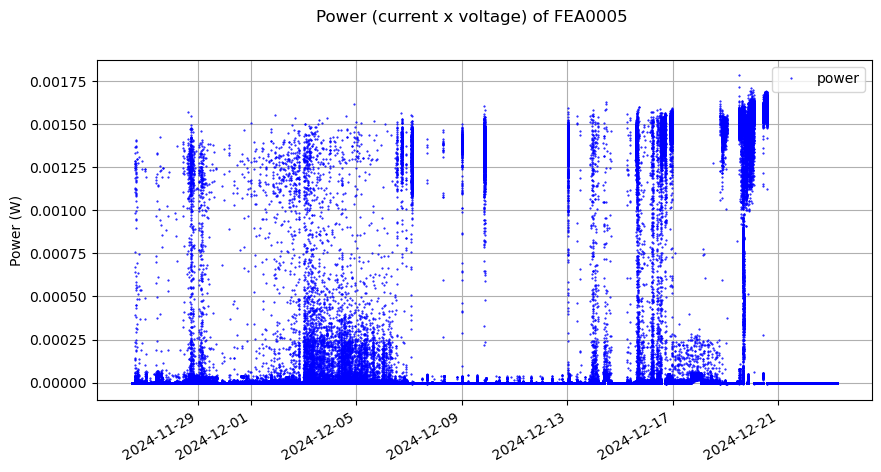

In [83]:
from datetime import date

df = df_F0005.copy()

plt.figure(dpi=200)
fig, ax1 = plt.subplots(1,1, sharex='col', figsize=(10, 5))

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

power = df.VMON * df.IMON * 1e-6
print(power)

ax1.plot(datetime_list, power,'.',color='blue',  label= 'power', markersize=1)

# time period with current emission
ts1 = '24/12/19-14:40:11'
te1 = '24/12/19-15:15:21'
#ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-11:55:11'
te2 = '24/12/19-12:30:21'
#ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts3 = '24/09/09-08:35:11'
te3 = '24/09/09-20:18:21'
#ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f"Power (current x voltage) of {FEA_name}")
ax1.set_ylabel('Power (W)')
#ax1.set_yscale('log')
#ax1.set_ylim(300)
#ax1.set_xlim([date(2024,11,26), date(2024,12,21)])

ax1.grid()
ax1.legend()

plt.gcf().autofmt_xdate()
plt.show()

#### partial plot

current used to baseline correction is -3.714388748630377e-08


<Figure size 1280x960 with 0 Axes>

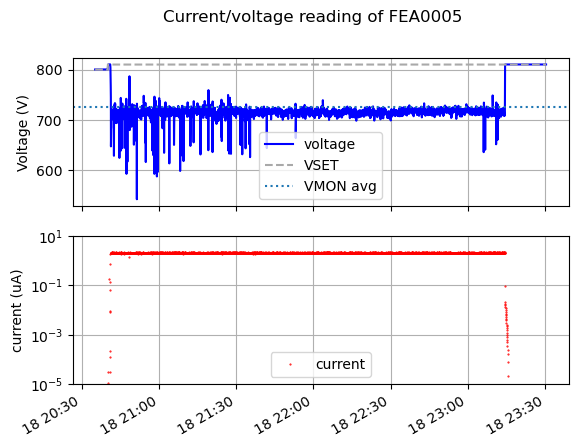

In [ ]:
t_start = '24/12/18-20:35:11'
t_end = '24/12/18-23:30:21'

t_start_base = '24/11/26-12:30:01'
t_end_base = '24/11/26-12:40:00'

new_df_F0005 = FEA_analysis.partial_charge(df_F0005, t_start, t_end, t_start_base, t_end_base)
new_df_F0005.loc[new_df_F0005['ch']==2, 'FEA'] = FEA[2]

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0005

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)
ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label='VSET')
ax1.axhline(mean(df.VMON.tolist()), linestyle= ':', label = 'VMON avg')

fig.suptitle(f"Current/voltage reading of {df.FEA[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()

current used to baseline correction is -4.0736542166679274e-22


<Figure size 1280x960 with 0 Axes>

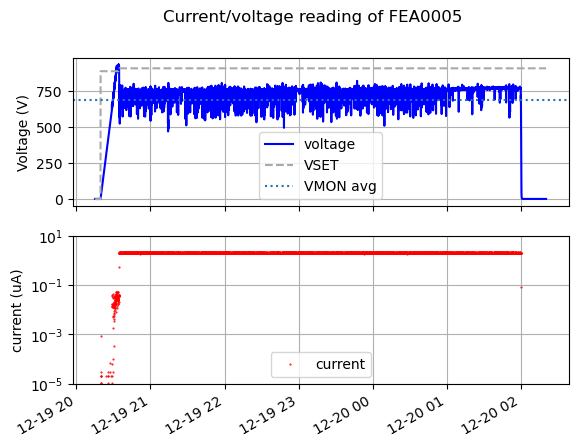

In [ ]:
t_start = '24/12/19-20:15:11'
t_end = '24/12/20-02:20:21'

t_start_base = '24/11/26-12:30:01'
t_end_base = '24/11/26-12:40:00'

new_df_F0005 = FEA_analysis.partial_charge(df_F0005, t_start, t_end, t_start_base, t_end_base)
new_df_F0005.loc[new_df_F0005['ch']==2, 'FEA'] = FEA[2]

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0005

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)
ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label='VSET')
ax1.axhline(mean(df.VMON.tolist()), linestyle= ':', label = 'VMON avg')

fig.suptitle(f"Current/voltage reading of {df.FEA[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()

### FEA 0007

0.004482679351381938


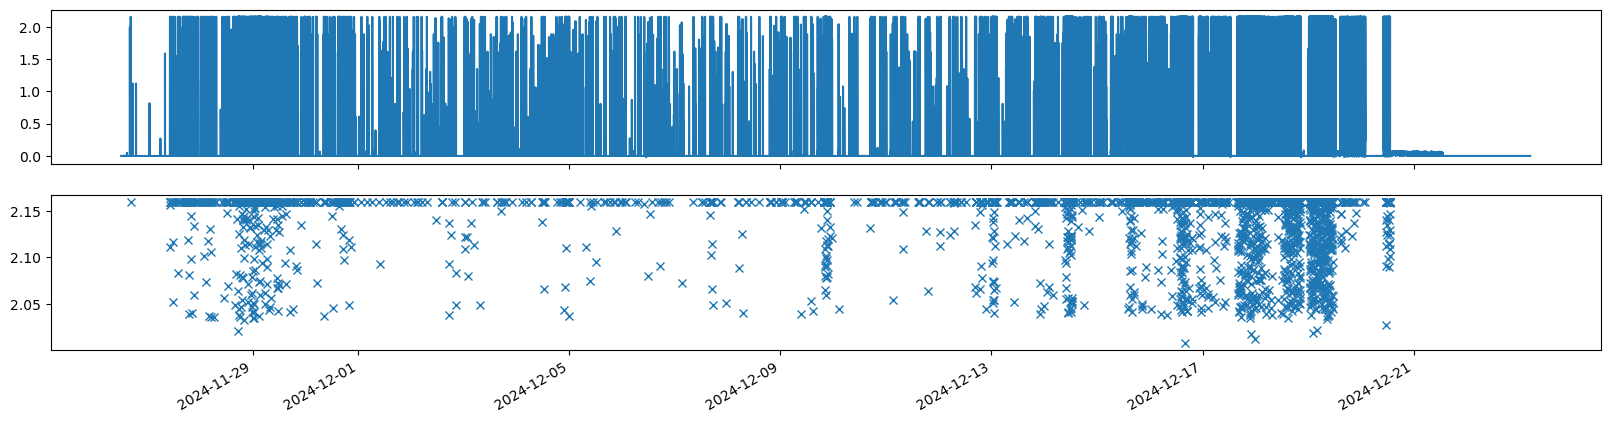

In [ ]:
df = df_F0007.copy()

x = df['IMON']

datetime_list = []
datetime_list_peaks = []

peaks, _ = find_peaks(x, threshold=[2,None])

for d in df.timestamp:
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

for d in df.timestamp.loc[peaks]:
    datetime_list_peaks.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

print(len(x[peaks])/len(x))


fig, (ax1, ax2) = plt.subplots(2,1, sharex='col', figsize=(20, 5))

ax1.plot(datetime_list,x)
ax2.plot(datetime_list_peaks, x.loc[peaks], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
#ax2.set_yscale('log')

plt.gcf().autofmt_xdate()
plt.show()

0.02950323601704656


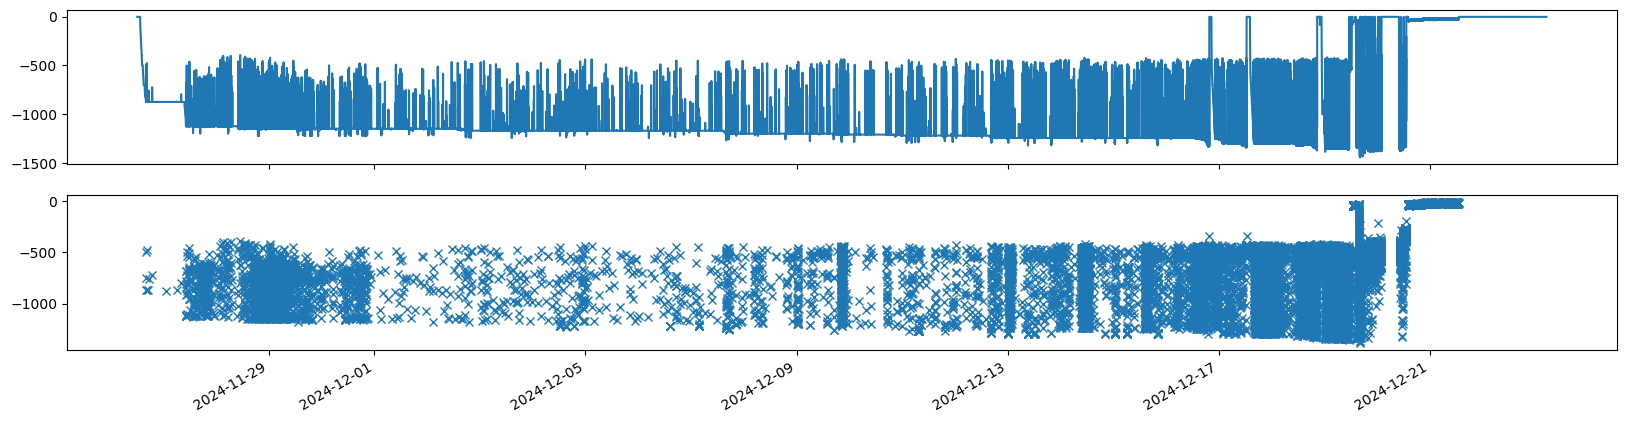

In [ ]:
df = df_F0007.copy()

x = -df['VMON']

datetime_list = []
datetime_list_peaks = []

peaks, _ = find_peaks(x,threshold=[0.5,None])

for d in df.timestamp:
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

for d in df.timestamp.loc[peaks]:
    datetime_list_peaks.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

print(len(x[peaks])/len(x))


fig, (ax1, ax2) = plt.subplots(2,1, sharex='col', figsize=(20, 5))

ax1.plot(datetime_list,x)
ax2.plot(datetime_list_peaks, x.loc[peaks], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
#ax2.set_yscale('log')

plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
# cuts

df = df_F0007.copy()

df = FEA_analysis.cumulated_charge(df)
print(df)

df.loc[df.VMON < 100, 'IMON'] = 0

df_VMON_cutOnly = df.copy()

x = df['IMON']
peaks, _ = find_peaks(x, threshold=[2,None])
df= df.drop(peaks)
#df.loc[peaks]['IMON'] = 0
#print(df.loc[peaks]['IMON'])
df = df.reset_index(drop=True)

x = -df['VMON']
peaks, _ = find_peaks(x,threshold=[0.5,None])
df = df.drop(peaks)
df = df.reset_index(drop=True)

cum_df_F0007 = FEA_analysis.cumulated_charge(df)

cum_df_F0007

                timestamp      IMON  VMON  VSET  ISET  caen  ch RUP RDW  \
0       24/11/26-12:14:03 -0.000011  1.45   0.0   2.1     2   2  no  no   
1       24/11/26-12:14:06 -0.000011  1.45   0.0   2.1     2   2  no  no   
2       24/11/26-12:14:09 -0.000011  1.45   0.0   2.1     2   2  no  no   
3       24/11/26-12:14:11 -0.000021  1.45   0.0   2.1     2   2  no  no   
4       24/11/26-12:14:14 -0.000021  1.45   0.0   2.1     2   2  no  no   
...                   ...       ...   ...   ...   ...   ...  ..  ..  ..   
904811  24/12/23-05:00:18 -0.000111  1.50   0.0   2.1     2   2  no  no   
904812  24/12/23-05:00:21 -0.000111  1.50   0.0   2.1     2   2  no  no   
904813  24/12/23-05:00:23 -0.000111  1.50   0.0   2.1     2   2  no  no   
904814  24/12/23-05:00:26 -0.000111  1.50   0.0   2.1     2   2  no  no   
904815  24/12/23-05:00:28 -0.000111  1.50   0.0   2.1     2   2  no  no   

            FEA  cumulatedCharge  
0       FEA0007        -0.000022  
1       FEA0007        -0.000

,timestamp,IMON,VMON,VSET,ISET,caen,ch,RUP,RDW,FEA,cumulatedCharge
0,24/11/26-12:14:03,0.0,1.45,0.0,2.1,2,2,no,no,FEA0007,0.000000
1,24/11/26-12:14:06,0.0,1.45,0.0,2.1,2,2,no,no,FEA0007,0.000000
2,24/11/26-12:14:09,0.0,1.45,0.0,2.1,2,2,no,no,FEA0007,0.000000
3,24/11/26-12:14:11,0.0,1.45,0.0,2.1,2,2,no,no,FEA0007,0.000000
4,24/11/26-12:14:14,0.0,1.45,0.0,2.1,2,2,no,no,FEA0007,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
877568,24/12/23-05:00:18,0.0,1.50,0.0,2.1,2,2,no,no,FEA0007,31394.263264
877569,24/12/23-05:00:21,0.0,1.50,0.0,2.1,2,2,no,no,FEA0007,31394.263264
877570,24/12/23-05:00:23,0.0,1.50,0.0,2.1,2,2,no,no,FEA0007,31394.263264
877571,24/12/23-05:00:26,0.0,1.50,0.0,2.1,2,2,no,no,FEA0007,31394.263264


#### charge plot

0.0


<Figure size 640x480 with 0 Axes>

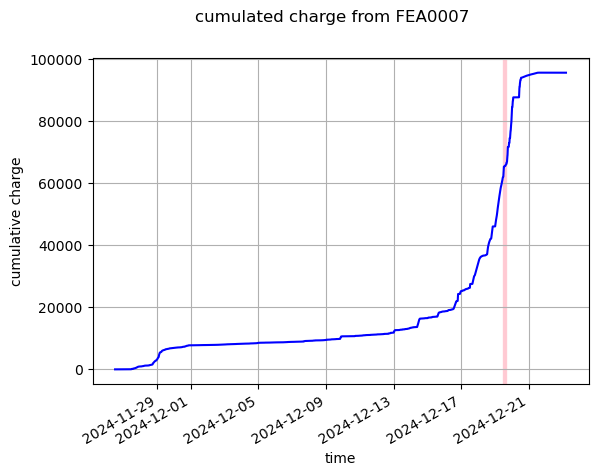

In [ ]:
df = df_VMON_cutOnly.copy()

plt.figure(dpi=100)
fig, ax1 = plt.subplots(1,1, sharex='col')

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df['cumulatedCharge'].tolist(),'-',color='blue',  label= 'cumulative charge', markersize=1)

ts1 = '24/12/19-14:40:11'
te1 = '24/12/19-15:15:21'
ax1.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-11:55:11'
te2 = '24/12/19-12:30:21'
ax1.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f'cumulated charge from {FEA_name}')
ax1.set_ylabel('cumulative charge')
ax1.set_xlabel('time')
ax1.grid()

plt.gcf().autofmt_xdate()


print(1 - len(df['timestamp'])/len(df_F0007['timestamp']))

#### entire plot

<Figure size 1280x960 with 0 Axes>

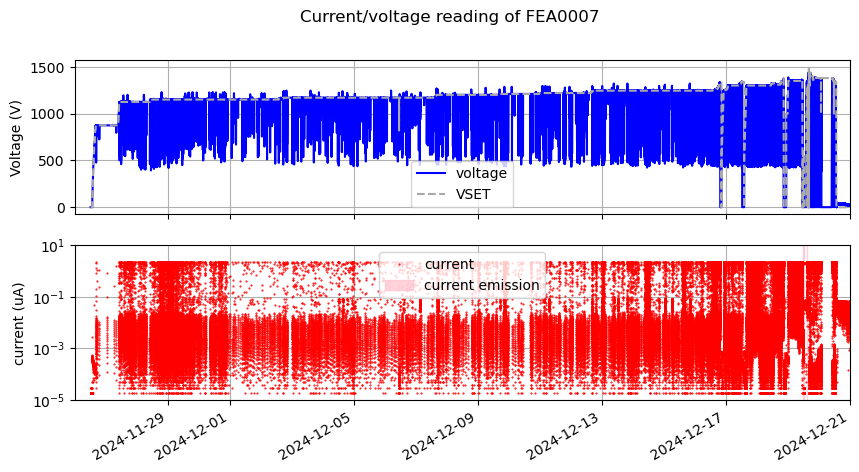

In [ ]:
# plot of the entire run
from datetime import date

df = df_F0007.copy()

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col', figsize=(10, 5))

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df['VMON'].tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(datetime_list, df['IMON'].tolist(),'.',color='red', label='current', markersize=1)
ax1.plot(datetime_list, df.VSET.tolist(), '--', color='darkgrey', label='VSET')

# time period with current emission
ts1 = '24/12/19-14:40:11'
te1 = '24/12/19-15:15:21'
ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-11:55:11'
te2 = '24/12/19-12:30:21'
ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts3 = '24/09/09-08:35:11'
te3 = '24/09/09-20:18:21'
#ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f"Current/voltage reading of {FEA_name}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.set_xlim([date(2024,11,26), date(2024,12,21)])

ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()
plt.show()

#### power plot

0        -1.566737e-11
1        -1.566737e-11
2        -1.566737e-11
3        -3.016737e-11
4        -3.016737e-11
              ...     
904811   -1.662076e-10
904812   -1.662076e-10
904813   -1.662076e-10
904814   -1.662076e-10
904815   -1.662076e-10
Length: 904816, dtype: float64


<Figure size 1280x960 with 0 Axes>

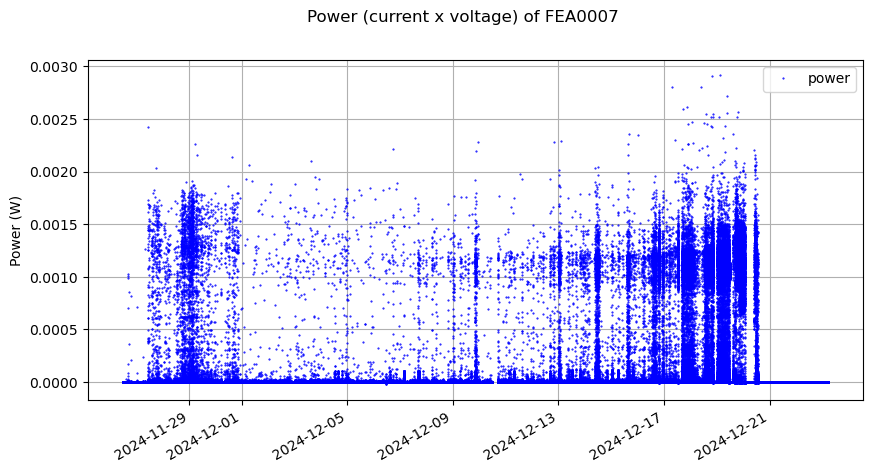

In [84]:
from datetime import date

df = df_F0007.copy()

plt.figure(dpi=200)
fig, ax1 = plt.subplots(1,1, sharex='col', figsize=(10, 5))

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

power = df.VMON * df.IMON * 1e-6
print(power)

ax1.plot(datetime_list, power,'.',color='blue',  label= 'power', markersize=1)

# time period with current emission
ts1 = '24/12/19-14:40:11'
te1 = '24/12/19-15:15:21'
#ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-11:55:11'
te2 = '24/12/19-12:30:21'
#ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts3 = '24/09/09-08:35:11'
te3 = '24/09/09-20:18:21'
#ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f"Power (current x voltage) of {FEA_name}")
ax1.set_ylabel('Power (W)')
#ax1.set_yscale('log')
#ax1.set_ylim(300)
#ax1.set_xlim([date(2024,11,26), date(2024,12,21)])

ax1.grid()
ax1.legend()

plt.gcf().autofmt_xdate()
plt.show()

0        -1.566737e-11
1        -1.566737e-11
2        -1.566737e-11
3        -3.016737e-11
4        -3.016737e-11
              ...     
904811   -1.662076e-10
904812   -1.662076e-10
904813   -1.662076e-10
904814   -1.662076e-10
904815   -1.662076e-10
Length: 904816, dtype: float64


<Figure size 1280x960 with 0 Axes>

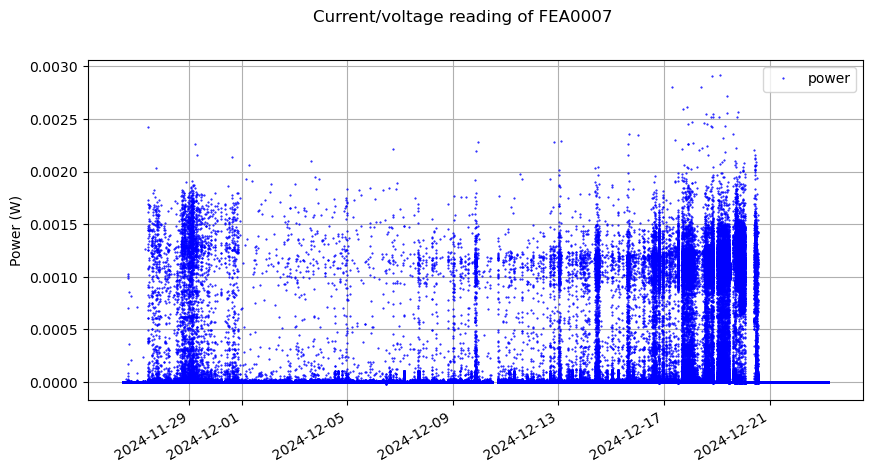

In [ ]:
from datetime import date

df = df_F0007.copy()

plt.figure(dpi=200)
fig, ax1 = plt.subplots(1,1, sharex='col', figsize=(10, 5))

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

power = df.VMON * df.IMON * 1e-6
print(power)

ax1.plot(datetime_list, power,'.',color='blue',  label= 'power', markersize=1)

# time period with current emission
ts1 = '24/12/19-14:40:11'
te1 = '24/12/19-15:15:21'
#ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-11:55:11'
te2 = '24/12/19-12:30:21'
#ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts3 = '24/09/09-08:35:11'
te3 = '24/09/09-20:18:21'
#ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f"Current/voltage reading of {FEA_name}")
ax1.set_ylabel('Power (W)')
#ax1.set_yscale('log')
#ax1.set_ylim(300)
#ax1.set_xlim([date(2024,11,26), date(2024,12,21)])

ax1.grid()
ax1.legend()

plt.gcf().autofmt_xdate()
plt.show()

#### partial plot

current used to baseline correction is -4.597908402442393e-08


<Figure size 1280x960 with 0 Axes>

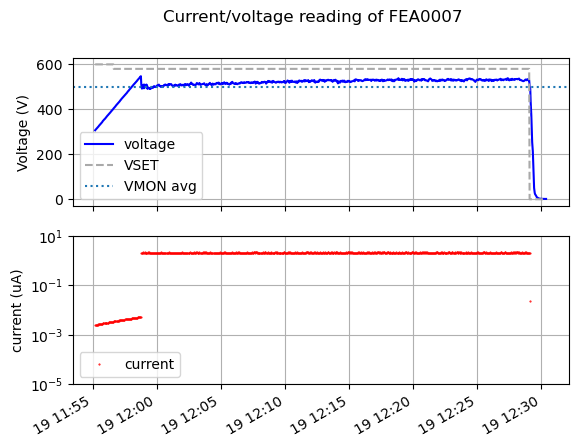

In [ ]:
t_start = '24/12/19-11:55:11'
t_end = '24/12/19-12:30:21'

t_start_base = '24/11/26-12:30:01'
t_end_base = '24/11/26-12:40:00'

new_df_F0007 = FEA_analysis.partial_charge(df_F0007, t_start, t_end, t_start_base, t_end_base)
new_df_F0007.loc[new_df_F0007['ch']==2, 'FEA'] = FEA[3]

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0007

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)
ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label='VSET')
ax1.axhline(mean(df.VMON.tolist()), linestyle= ':', label = 'VMON avg')

fig.suptitle(f"Current/voltage reading of {df.FEA[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()